# Creating Maps 🌍

If you made it to this point, then you should have understood how STL specifications are defined and how you can work with them in code. before delving into how to plan trajectroies that satisfy a given STL specification, we need to understand how to create maps and workspaces within which our robot will live.

A workspace is nothing but the bounded state within which your robot state will leave. This, as you might expect, is defined again by a polytope. For the sake of simplicity we here consider a simple single integrator for which we create a simple workspace and a map (i.e. a workspace with obstacles)

In [1]:
from   matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)

from stl_tool.stl import GOp, FOp, ContinuousLinearSystem, BoxPredicate2d
from stl_tool.environment               import Map
from stl_tool.polyhedron                import Box2d

from stl_tool.planners import StlRRTStar
from json import loads
import os 

We can now create some specification and visualize where the predicates are located.

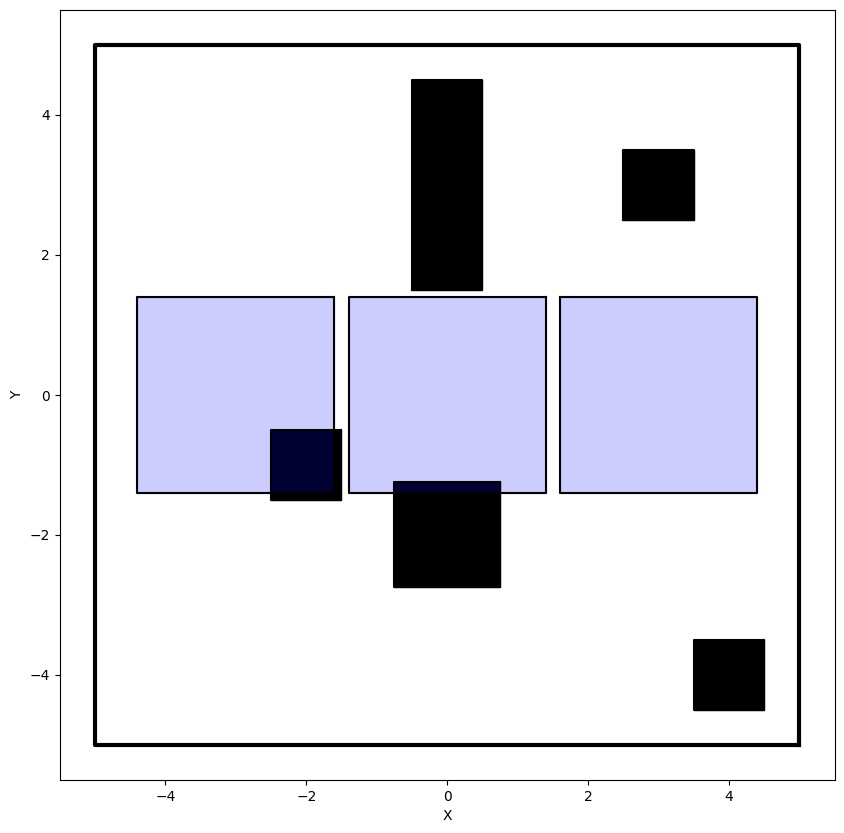

In [2]:
##########################################################
# Create work space and mapo
##########################################################
workspace     = Box2d(x = 0,y = 0,size = 10) # square 10x10 (this is a 2d workspace, so the system it refers to must be 2d)
map           = Map(workspace = workspace) # the map object contains the workpace, but it also contains the obstacles of your environment.

# load obstacles

# create obstacles
# some simple boxes
map.add_obstacle(Box2d(x = 3,y = 3,size = 1))
map.add_obstacle(Box2d(x = 4,y = -4,size = 1))
map.add_obstacle(Box2d(x = -2,y = -1,size = 1))
map.add_obstacle(Box2d(x = 0,y = -2,size = 1.5))
# you can create some rectangles even
map.add_obstacle(Box2d(x = 0,y = 3,size = [1,3]))

map.enlarge_obstacle(border_size=0.2)  # enlarge obstacles

map.draw()


##########################################################
# STL specifications
##########################################################

center         = np.array([-0., 0.])
box1_predicate = BoxPredicate2d(
    size=2.8, center=center, name="some nice predicate"
)  # creates a predicate for a bounded box over the first two dimensions
box2_predicate = BoxPredicate2d(
    size=2.8, center=center + np.array([-3, 0.0]), name="another one"
)  # creates a predicate for a bounded box over the first two dimensions
box3_predicate = BoxPredicate2d(
    size=2.8, center=center + np.array([3, 0.0]), name="the third one"
)  # creates a predicate for a bounded box over the first two dimensions
formula        = (GOp(10.,14.) >> box1_predicate)  & (FOp(17.,20.) >> box2_predicate) & (FOp(29.,30.) >> box3_predicate) 

fig,ax = map.draw_formula_predicate(formula = formula, alpha =0.2)
plt.show()

In [8]:
##########################################################
# system and dynamics
##########################################################
A             = np.random.rand(2,2)*0.1
B             = np.diag([1.5,1.5])
dt            = 1.
system        = ContinuousLinearSystem(A, B, dt = dt)
max_input     = 5.
input_bounds  = Box2d(x = 0.,y = 0.,size = max_input*2) 

print(A)


fig,ax = map.draw_formula_predicate(formula = formula, alpha =0.2)
plt.show()

[[0.00514672 0.04408098]
 [0.00298762 0.04568332]]
